# 使用pyecharts将淘宝爬取的数据可视化

In [3]:
#首先将爬取的淘宝数据导入到代码中：
from json import loads
from pyecharts import Geo, Map, WordCloud

with open('taobao.json', 'r', encoding='UTF-8') as f:
    product_list = loads(f.read())

用地理坐标系（Geo）绘制散点图显示全国iPad商铺所在城市分布：
注意：Geo，Map无法显示底图

pyecharts v0.3.2以后，pyecharts 将不再自带地图 js 文件。如用户需要用到地图图表，可自行安装对应的地图文件包。

地图文件被分成了三个 Python 包，分别为：
全球国家地图: echarts-countries-pypkg (1.9MB)

中国省级地图: echarts-china-provinces-pypkg (730KB)


中国市级地图: echarts-china-cities-pypkg (3.8MB)

（1）pycharm直接在设置里面搜索安装这三个库

全球国家地图: echarts-countries-pypkg (1.9MB): 世界地图和 213 个国家，包括中国地图

中国省级地图: echarts-china-provinces-pypkg (730KB)：23 个省，5 个自治区

中国市级地图: echarts-china-cities-pypkg (3.8MB)：370 个中国城市


（2）pip安装

     pip install echarts-countries-pypkg 

    pip install echarts-china-provinces-pypkg  

     pip install echarts-china-cities-pypkg 


In [4]:
 
def location(product_list):   # 城市
    for i in range(len(product_list)):
        try:
            yield product_list[i]['位置'].split(' ')[1]
        except Exception:
            pass

location_dict = {}      # 商铺位置字典（{"location": "count"}）
for sub in location(product_list):
    if sub not in location_dict:
        location_dict[sub] = 1
    else:
        location_dict[sub] += 1

location_list = []      # 商铺位置列表(省份名)

for key in location_dict.keys():
    location_list.append((key, location_dict[key]))

geo = Geo("淘宝iPad商铺分布图", "data from taobao.com", title_color="#fff",
          title_pos="center", width=1300,
          height=650, background_color='#404a59')
attr, value = geo.cast(location_list)
geo.add("", attr, value, visual_range=[0, 300], visual_text_color="#fff",
        symbol_size=15, is_visualmap=True)


In [5]:
geo.render()

使用地图(Map)绘制iPad所在省份分布图：

In [6]:
def location(product_list):   # 省份
    for i in range(len(product_list)): 
        yield product_list[i]['位置'].split(' ')[0]

location_dict = {}      # 商铺位置字典（{"location": "count"}）
for sub in location(product_list):
    if sub not in location_dict:
        location_dict[sub] = 1
    else:
        location_dict[sub] += 1
value = list(location_dict.values())
attr = list(location_dict.keys())
map = Map("全国淘宝iPad商铺分布图", "data from taobao.com", title_pos="center", width=1200, height=600)
map.add("", attr, value, maptype='china', is_visualmap=True, visual_text_color='#000')

In [7]:
map.render()

使用WordCloud(pyecharts自带的，非wordcloud包中的WordCloud)绘制省份词云图：
效果太丑，万不得已还是不要用pyecharts的WordCloud做词云 = =。

In [8]:
name = list(location_dict.keys())
value = list(location_dict.values())
wordcloud = WordCloud(width=1300, height=620)
wordcloud.add("", name, value, word_size_range=[20, 100], rotate_step=52)
wordcloud.render()
wordcloud

既然提到wordcloud包，那就用wordcloud与jieba来将爬取的商品标题做个词云图。
然后先来个基本词云图看下（wordcloud不支持中文，所以在font_path中需自行设置字体路径）：

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\new\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\new\AppData\Local\Temp\jieba.cache
Loading model cost 0.884 seconds.
DEBUG:jieba:Loading model cost 0.884 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


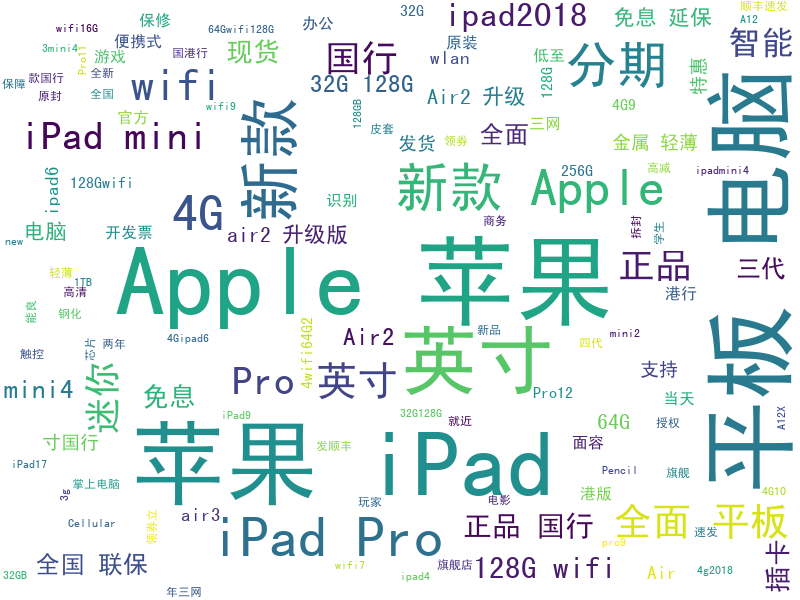

In [9]:
from wordcloud import WordCloud
from json import loads
import jieba


with open('taobao.json', 'r', encoding='utf-8') as f:
    product_list = loads(f.read())

text = str([product['标题'] for product in product_list]).replace("'", '').replace(',', '').rstrip(']').lstrip('[')   # 爬取的标题文本
cut_text = jieba.cut(text)   # jieba分词
result = '/'.join(cut_text)   # 设置个分隔符来分词，否则词云绘制失败
wc = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, max_font_size=100, max_words=5000)#,min_font_size=10)#,mode='RGBA',colormap='pink')
wc.generate(result)
wc.to_file('cloud.png')   # 储存图片
wc.to_image()